# Data Loading

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\viraj\Desktop\Internship\Project - 1\daily-website-visitors.csv")

In [4]:
# Cheaking First Five row

df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


# Basic Data Inspection

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [7]:
df.describe()

,Row,Day.Of.Week
count,2167.000000,2167.000000
mean,1084.000000,3.997231
std,625.703338,2.000229
min,1.000000,1.000000
25%,542.500000,2.000000
50%,1084.000000,4.000000
75%,1625.500000,6.000000
max,2167.000000,7.000000


In [8]:
df.isnull().sum()

Row                  0
Day                  0
Day.Of.Week          0
Date                 0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64

In [9]:
df.nunique()

Row                  2167
Day                     7
Day.Of.Week             7
Date                 2167
Page.Loads           1756
Unique.Visits        1658
First.Time.Visits    1587
Returning.Visits      663
dtype: int64

In [10]:
df.columns

Index(['Row', 'Day', 'Day.Of.Week', 'Date', 'Page.Loads', 'Unique.Visits',
       'First.Time.Visits', 'Returning.Visits'],
      dtype='object')

In [11]:
# Convert in to Dateformate

df['Date'] = pd.to_datetime(df['Date'])

In [12]:
# Removing Comas

for col in ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']:
    df[col] = df[col].str.replace(',','')
    df[col] = pd.to_numeric(df[col])

In [13]:
# drop unneccesary column

df.drop(columns=['Row'], inplace=True)

In [14]:
df.head(5)

,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,Sunday,1,2014-09-14,2146,1582,1430,152
1,Monday,2,2014-09-15,3621,2528,2297,231
2,Tuesday,3,2014-09-16,3698,2630,2352,278
3,Wednesday,4,2014-09-17,3667,2614,2327,287
4,Thursday,5,2014-09-18,3316,2366,2130,236


In [15]:
# EDA

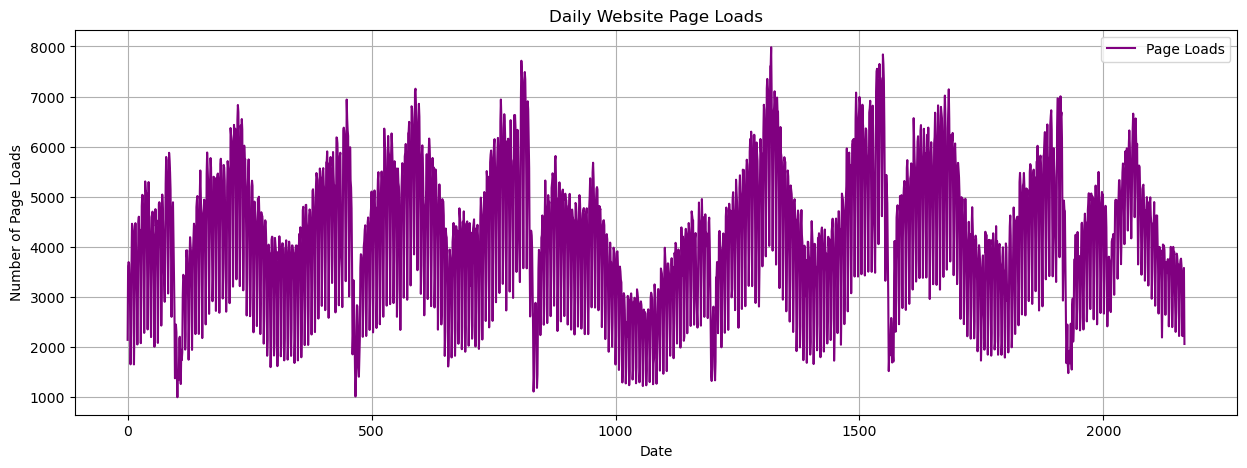

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(df.index, df['Page.Loads'], color='purple', label='Page Loads')
plt.title('Daily Website Page Loads')
plt.xlabel('Date')
plt.ylabel('Number of Page Loads')
plt.grid(True)
plt.legend()
plt.show()

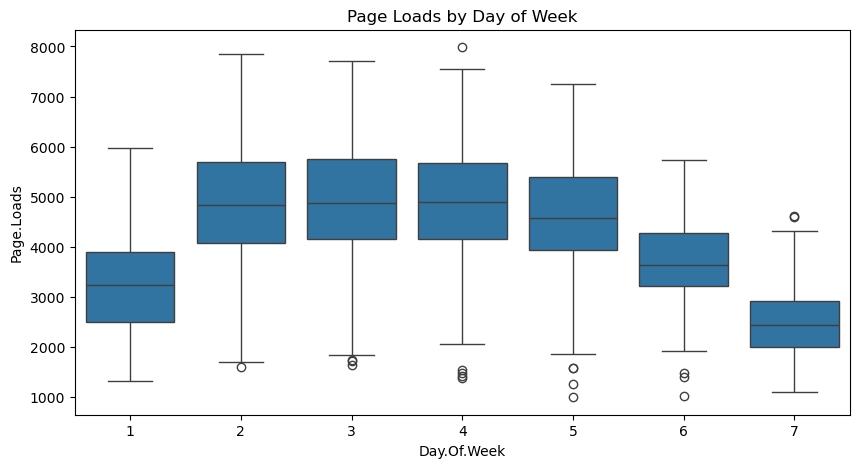

In [17]:
# Boxplot to Check Weekly Seasonality
df['Day.Of.Week'] = df['Day.Of.Week'].astype(str)

plt.figure(figsize=(10,5))
sns.boxplot(x='Day.Of.Week', y='Page.Loads', data=df)
plt.title('Page Loads by Day of Week')
plt.show()

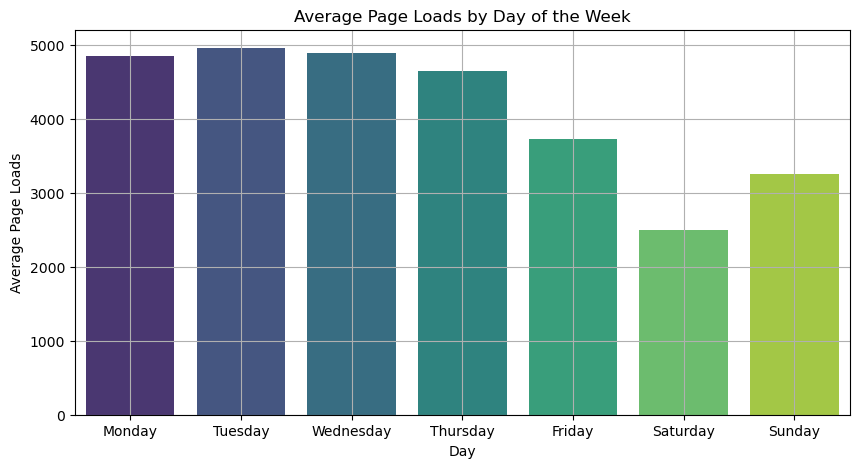

In [18]:
# Group by Day and calculate Average Page Loads by Day of the Week

day_avg = df.groupby('Day')['Page.Loads'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot

plt.figure(figsize=(10,5))
sns.barplot(x=day_avg.index, y=day_avg.values, hue=day_avg.index, palette='viridis', legend=False)
plt.title('Average Page Loads by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Average Page Loads')
plt.grid(True)
plt.show()

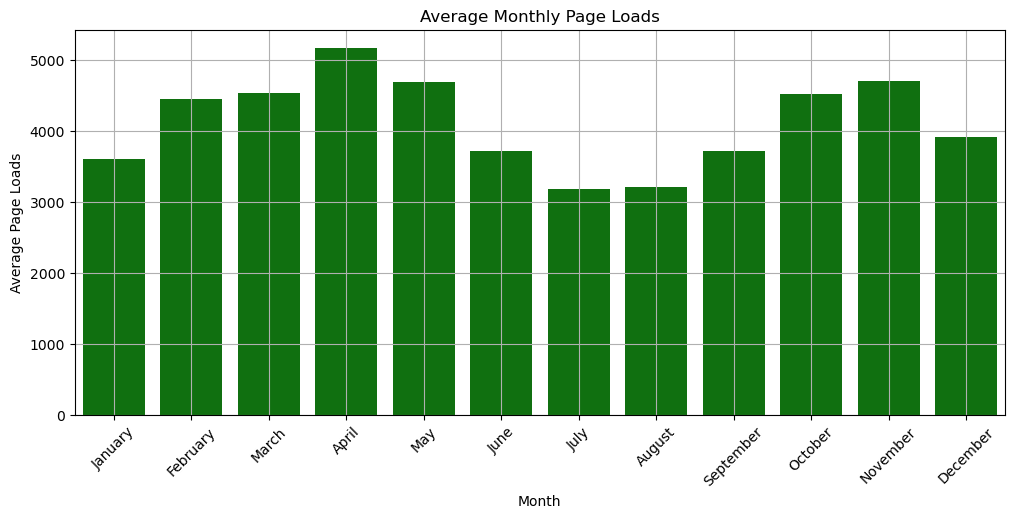

In [19]:
# Extract month name from Date column

df['Month'] = df['Date'].dt.month_name()

# Group and plot

month_avg = df.groupby('Month')['Page.Loads'].mean()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Plot

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.barplot(x=month_order, y=month_avg.reindex(month_order).values, color='green')
plt.title('Average Monthly Page Loads')
plt.xlabel('Month')
plt.ylabel('Average Page Loads')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [20]:
# Cheking Stationarity

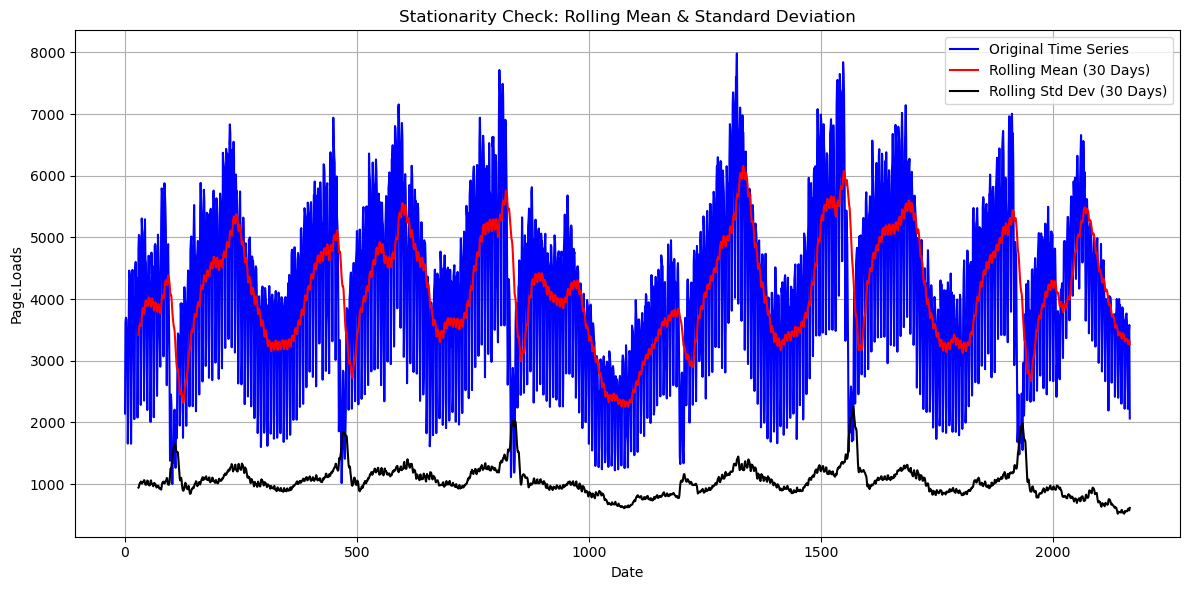

In [21]:
ts = df['Page.Loads']

# Rolling Statistics
rolling_mean = ts.rolling(window=30).mean()    # 30-day Rolling Mean
rolling_std = ts.rolling(window=30).std()      # 30-day Rolling Std Deviation

# Plot Original, Rolling Mean & Std Dev
plt.figure(figsize=(12,6))
plt.plot(ts, color='blue', label='Original Time Series')
plt.plot(rolling_mean, color='red', label='Rolling Mean (30 Days)')
plt.plot(rolling_std, color='black', label='Rolling Std Dev (30 Days)')
plt.title('Stationarity Check: Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Page.Loads')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Checking Stationarity using Statstical Tests

In [23]:
# ADF TEST
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test on 'Page.Loads'
result = adfuller(df['Page.Loads'])

# Extracting Values
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Number of Lags Used:', result[2])
print('Number of Observations Used:', result[3])

# Critical Values
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key} : {value}')

ADF Statistic: -4.28382143618767
p-value: 0.00047375782574649754
Number of Lags Used: 26
Number of Observations Used: 2140
Critical Values:
   1% : -3.4334094211542983
   5% : -2.8628915360971003
   10% : -2.5674894918770197


In [24]:
from statsmodels.tsa.stattools import kpss

# KPSS Test Function
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    
    if p_value < 0.05:
        print("\nConclusion: Data is Non-Stationary")
    else:
        print("\nConclusion: Data is Stationary")

# Run KPSS Test on Page.Loads
kpss_test(df['Page.Loads'], regression='c', nlags="auto")

KPSS Statistic: 0.20520671416220546
p-value: 0.1
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

Conclusion: Data is Stationary


C:\Users\viraj\AppData\Local\Temp\ipykernel_22404\2690326858.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


<Figure size 1200x800 with 0 Axes>

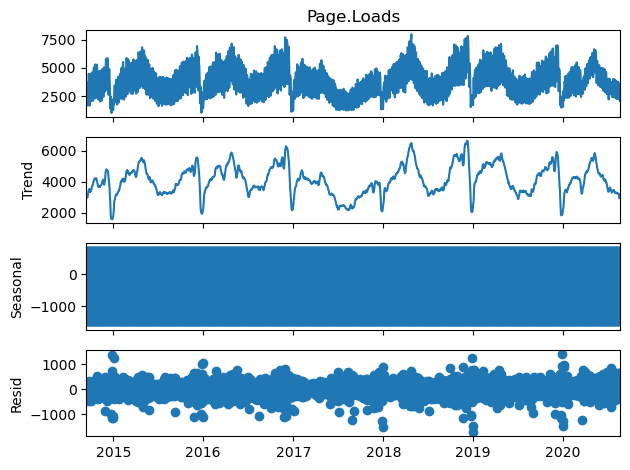

<Figure size 1200x800 with 0 Axes>

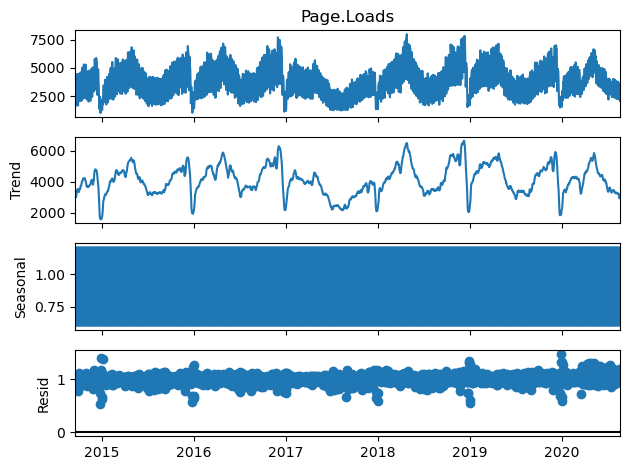

In [25]:
# Seasonal Decompose (Additive/Multiplicative)

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Set Date as Index
df.set_index('Date', inplace=True)

# Decomposition - Additive
result_add = seasonal_decompose(df['Page.Loads'], model='additive', period=7)

# Decomposition - Multiplicative
result_mul = seasonal_decompose(df['Page.Loads'], model='multiplicative', period=7)

# Plot Additive Decomposition
plt.figure(figsize=(12, 8))
plt.suptitle("Additive Decomposition", fontsize=16)
result_add.plot()
plt.show()

# Plot Multiplicative Decomposition
plt.figure(figsize=(12, 8))
plt.suptitle("Multiplicative Decomposition", fontsize=16)
result_mul.plot()
plt.show()

<Figure size 1000x500 with 0 Axes>

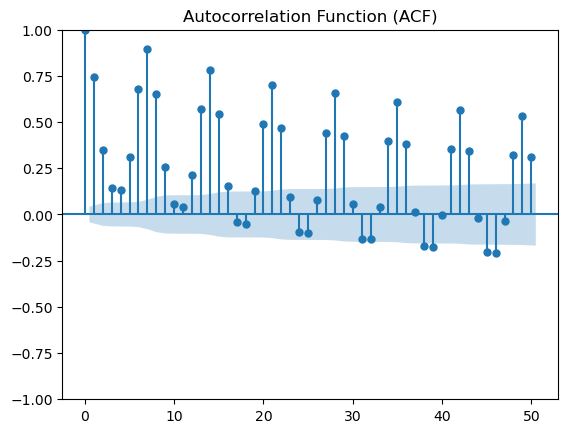

<Figure size 1000x500 with 0 Axes>

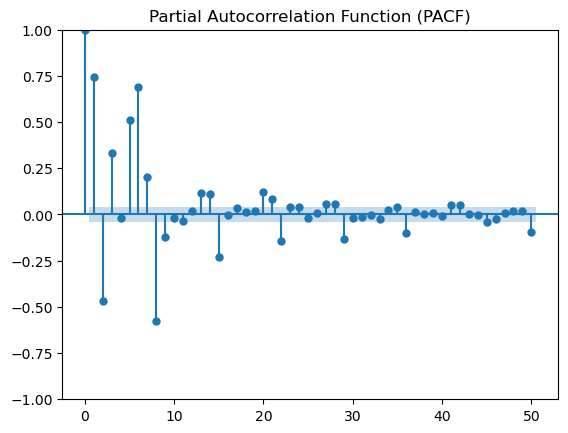

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF Plot
plt.figure(figsize=(10,5))
plot_acf(df['Page.Loads'], lags=50)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# PACF Plot
plt.figure(figsize=(10,5))
plot_pacf(df['Page.Loads'], lags=50, method='ywm')  # method='ywm' is safer for large data
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

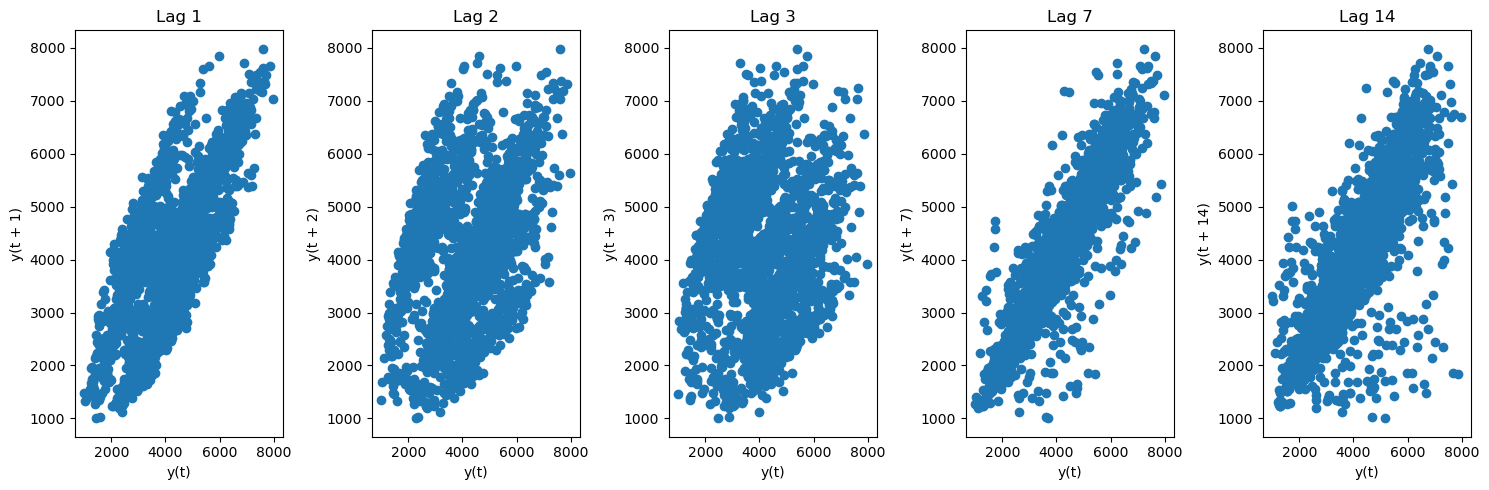

In [27]:
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

# Lags list
lags = [1, 2, 3, 7, 14]

plt.figure(figsize=(15,5))

for i, lag in enumerate(lags):
    plt.subplot(1, len(lags), i+1)
    lag_plot(df['Page.Loads'], lag=lag)
    plt.title(f'Lag {lag}')

plt.tight_layout()
plt.show()


In [28]:
# Outlier detection & handling using IQR (for 'Page.Loads')
import numpy as np
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Page.Loads'].quantile(0.25)
Q3 = df['Page.Loads'].quantile(0.75)

# Interquartile Range
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Replace outliers with upper/lower bound values (Winsorization)
df['Page.Loads'] = np.where(df['Page.Loads'] > upper_bound, upper_bound,
                            np.where(df['Page.Loads'] < lower_bound, lower_bound, df['Page.Loads']))

Lower Bound: 255.5
Upper Bound: 7879.5


In [29]:
# Check how many outliers are there

outliers_below = df[df['Page.Loads'] < lower_bound]
outliers_above = df[df['Page.Loads'] > upper_bound]

print(f"Outliers Below Lower Bound: {len(outliers_below)}")
print(f"Outliers Above Upper Bound: {len(outliers_above)}")


Outliers Below Lower Bound: 0
Outliers Above Upper Bound: 0


In [30]:
# Train-Test Split (Last 30 days for testing)

train = df.iloc[:-30]
test = df.iloc[-30:]

In [31]:
df.index = pd.to_datetime(df.index)
df = df.asfreq('D')

# Ensure datetime index
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

# sorting index
train = train.sort_index()
test = test.sort_index()
train = train[~train.index.duplicated()]

# Set frequency
train = train.asfreq('D')                 # Important: set daily frequency
train.index.freq = 'D'                    # Optional but safe

# Fill missing values if any
train['Page.Loads'] = train['Page.Loads'].ffill()

In [32]:
df.head(5)

,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Month
Date,,,,,,,
2014-09-14,Sunday,1,2146.0,1582,1430,152,September
2014-09-15,Monday,2,3621.0,2528,2297,231,September
2014-09-16,Tuesday,3,3698.0,2630,2352,278,September
2014-09-17,Wednesday,4,3667.0,2614,2327,287,September
2014-09-18,Thursday,5,3316.0,2366,2130,236,September


In [33]:
df.columns

Index(['Day', 'Day.Of.Week', 'Page.Loads', 'Unique.Visits',
       'First.Time.Visits', 'Returning.Visits', 'Month'],
      dtype='object')

# SARIMA

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# SARIMA Model
model = SARIMAX(train['Page.Loads'],
                order=(2,1,0),
                seasonal_order=(1,0,2,7),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)
print(results.summary())

# Train Accuracy
train_pred = results.fittedvalues

# Align lengths
train_actual = train['Page.Loads'].iloc[-len(train_pred):]

# Metrics for Train
train_rmse = np.sqrt(mean_squared_error(train_actual, train_pred))
train_mape = mean_absolute_percentage_error(train_actual, train_pred) * 100

# Print Train Metrics
print(f'\nTrain RMSE: {train_rmse}')
print(f'Train MAPE: {train_mape:.2f}%')

# Test Forecasting (Next 30 Days)
forecast = results.get_forecast(steps=30)
forecast_index = test.index
forecast_mean = forecast.predicted_mean

# Metrics for Test
test_rmse = np.sqrt(mean_squared_error(test['Page.Loads'], forecast_mean))
test_mape = mean_absolute_percentage_error(test['Page.Loads'], forecast_mean) * 100

# Print Test Metrics
print(f'\nTest RMSE: {test_rmse}')
print(f'Test MAPE: {test_mape:.2f}%')

                                       SARIMAX Results                                        
Dep. Variable:                             Page.Loads   No. Observations:                 2137
Model:             SARIMAX(2, 1, 0)x(1, 0, [1, 2], 7)   Log Likelihood              -15350.912
Date:                                Thu, 14 Aug 2025   AIC                          30713.824
Time:                                        17:10:57   BIC                          30747.781
Sample:                                    09-14-2014   HQIC                         30726.255
                                         - 07-20-2020                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0594      0.017     -3.592      0.000      -0.092      -0.027
ar.

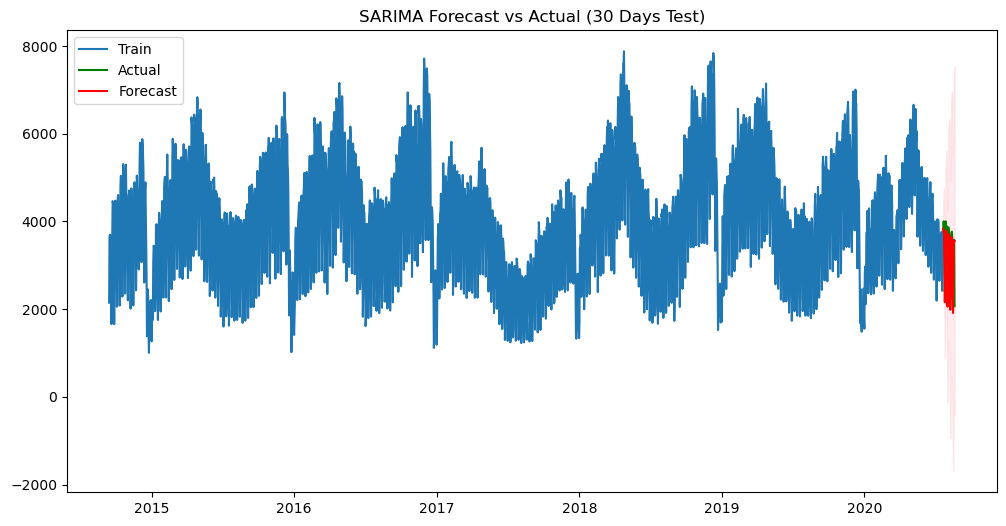

In [36]:
# Plot Forecast vs Actual
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Page.Loads'], label='Train')
plt.plot(test.index, test['Page.Loads'], label='Actual', color='green')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast.conf_int()['lower Page.Loads'],
                 forecast.conf_int()['upper Page.Loads'], color='pink', alpha=0.3)
plt.title('SARIMA Forecast vs Actual (30 Days Test)')
plt.legend()
plt.show()

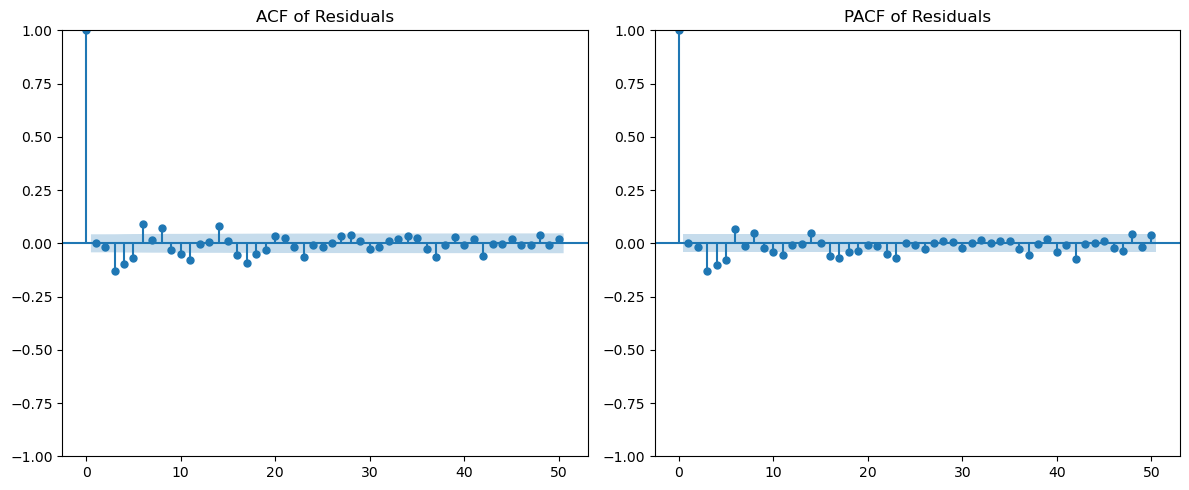

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Residuals from SARIMA Model
residuals = train_actual - train_pred

# Plot ACF and PACF of Residuals
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_acf(residuals.dropna(), ax=plt.gca(), lags=50)
plt.title('ACF of Residuals')

plt.subplot(1, 2, 2)
plot_pacf(residuals.dropna(), ax=plt.gca(), lags=50, method='ywm')
plt.title('PACF of Residuals')

plt.tight_layout()
plt.show()

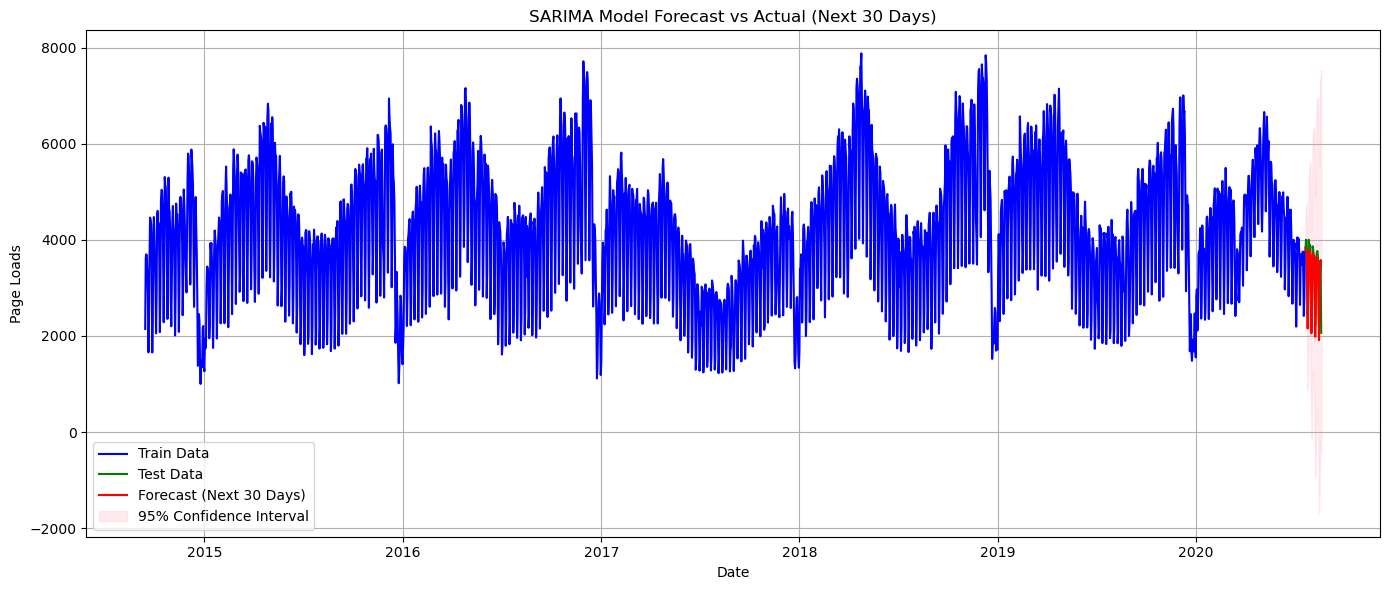

In [38]:
import matplotlib.pyplot as plt

# Get forecast with confidence interval
forecast_obj = results.get_forecast(steps=30)
forecast_mean = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int()

# Plotting
plt.figure(figsize=(14,6))
plt.plot(train.index, train['Page.Loads'], label='Train Data', color='blue')
plt.plot(test.index, test['Page.Loads'], label='Test Data', color='green')
plt.plot(test.index, forecast_mean, label='Forecast (Next 30 Days)', color='red')

# Confidence Interval
plt.fill_between(test.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('SARIMA Model Forecast vs Actual (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Prophet

In [40]:
from prophet import Prophet

In [41]:
import logging
logging.getLogger("cmdstanpy").setLevel(logging.WARNING)

In [42]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Prepare data for Prophet
df_prophet = df[['Page.Loads']].reset_index()
df_prophet = df_prophet.rename(columns={'Date': 'ds', 'Page.Loads': 'y'})

# Split train-test (last 30 days as test)
train_prophet = df_prophet.iloc[:-30]
test_prophet = df_prophet.iloc[-30:]

# Prophet Model
model = Prophet()
model.fit(train_prophet)

# Create future dataframe (for test dates only)
future = test_prophet[['ds']]
forecast = model.predict(future)

# Evaluation on Test
y_true_test = test_prophet['y'].values
y_pred_test = forecast['yhat'].values

test_rmse = np.sqrt(mean_squared_error(y_true_test, y_pred_test))
test_mape = mean_absolute_percentage_error(y_true_test, y_pred_test) * 100

# prediction for Train
train_forecast = model.predict(train_prophet[['ds']])
y_true_train = train_prophet['y'].values
y_pred_train = train_forecast['yhat'].values

train_rmse = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
train_mape = mean_absolute_percentage_error(y_true_train, y_pred_train) * 100

# Print Results
print(f"Prophet Train RMSE: {train_rmse:.2f}")
print(f"Prophet Train MAPE: {train_mape:.2f}%\n")
print(f"Prophet Test RMSE: {test_rmse:.2f}")
print(f"Prophet Test MAPE: {test_mape:.2f}%")

17:11:00 - cmdstanpy - INFO - Chain [1] start processing
17:11:01 - cmdstanpy - INFO - Chain [1] done processing


Prophet Train RMSE: 478.22
Prophet Train MAPE: 10.12%

Prophet Test RMSE: 520.27
Prophet Test MAPE: 13.89%


# Exponential Smoothing (Holt-Winters)

In [44]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Fit Model
hw_model = ExponentialSmoothing(train['Page.Loads'],
                                trend='mul',
                                seasonal='mul',
                                seasonal_periods=7).fit()

# Train Predictions
train_pred = hw_model.fittedvalues

# Align actual train values
train_actual = train['Page.Loads'].iloc[-len(train_pred):]

# Train Metrics
train_rmse = np.sqrt(mean_squared_error(train_actual, train_pred))
train_mape = mean_absolute_percentage_error(train_actual, train_pred) * 100

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Train MAPE: {train_mape:.2f}%")

# Forecast for Test
test_forecast = hw_model.forecast(steps=30)

# Test Metrics
test_rmse = np.sqrt(mean_squared_error(test['Page.Loads'], test_forecast))
test_mape = mean_absolute_percentage_error(test['Page.Loads'], test_forecast) * 100

print(f"\nTest RMSE: {test_rmse:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")

Train RMSE: 342.79
Train MAPE: 7.06%

Test RMSE: 332.37
Test MAPE: 7.65%


C:\Users\viraj\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [45]:
# Machine Learning Model

In [46]:
df.head()

,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Month
Date,,,,,,,
2014-09-14,Sunday,1,2146.0,1582,1430,152,September
2014-09-15,Monday,2,3621.0,2528,2297,231,September
2014-09-16,Tuesday,3,3698.0,2630,2352,278,September
2014-09-17,Wednesday,4,3667.0,2614,2327,287,September
2014-09-18,Thursday,5,3316.0,2366,2130,236,September


In [47]:
df.columns

Index(['Day', 'Day.Of.Week', 'Page.Loads', 'Unique.Visits',
       'First.Time.Visits', 'Returning.Visits', 'Month'],
      dtype='object')

In [48]:
# Encoding for ML models

In [49]:
# Mapping dictionary
day_mapping = {
    'Sunday': 1,
    'Monday': 2,
    'Tuesday': 3,
    'Wednesday': 4,
    'Thursday': 5,
    'Friday': 6,
    'Saturday': 7
}

# Apply mapping to create new column
df['day_enc'] = df['Day'].map(day_mapping)

# drop unnecessary columns after encoding
df.drop(['Day', 'Day.Of.Week', 'Month'], axis=1, inplace=True)

# Machine Learnning Model

In [51]:
import pandas as pd

# Copy to avoid modifying original
df_ml = df.copy()

# Lag Features (1 to 7 days)
for i in range(1, 8):
    df_ml[f'lag_{i}'] = df_ml['Page.Loads'].shift(i)

# Rolling Features (7-day window)
df_ml['rolling_mean_7'] = df_ml['Page.Loads'].rolling(window=7).mean()
df_ml['rolling_std_7'] = df_ml['Page.Loads'].rolling(window=7).std()

# Drop rows with NaN from lagging
df_ml = df_ml.dropna()

# Target column (Page.Loads)
target = 'Page.Loads'

# Train-Test Split (Last 30 days as test)
train_ml = df_ml.iloc[:-30]
test_ml = df_ml.iloc[-30:]

# Separate features and target
X_train = train_ml.drop(columns=[target])
y_train = train_ml[target]

X_test = test_ml.drop(columns=[target])
y_test = test_ml[target]

# Random Forest

Train RMSE: 60.91
Train MAPE: 1.17%

Test RMSE: 133.56
Test MAPE: 3.78%


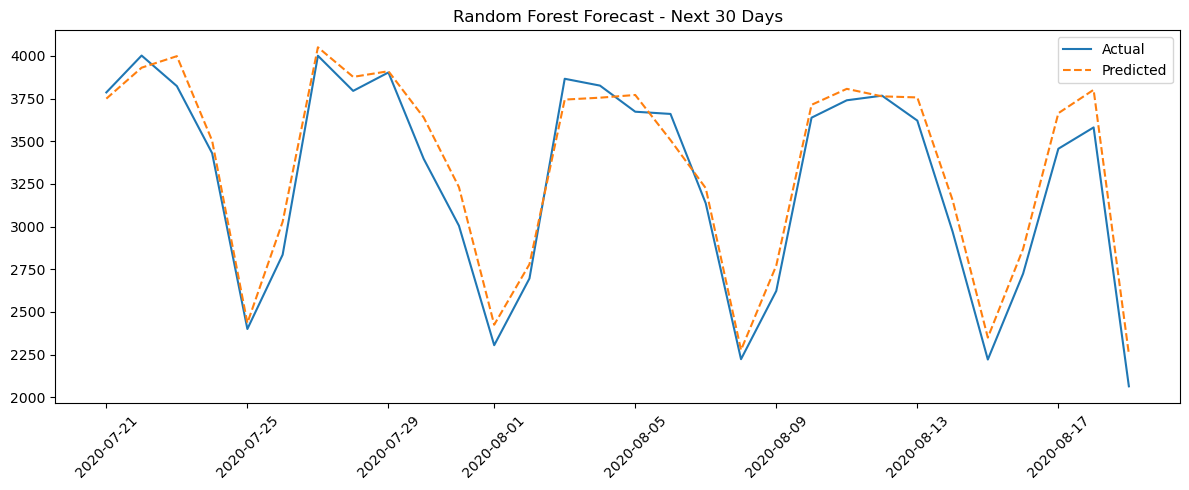

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Train Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

# Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
train_mape = mean_absolute_percentage_error(y_train, train_pred) * 100

test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
test_mape = mean_absolute_percentage_error(y_test, test_pred) * 100

# Print Results
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Train MAPE: {train_mape:.2f}%\n")

print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")

# Plot
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, test_pred, label='Predicted', linestyle='--')
plt.title('Random Forest Forecast - Next 30 Days')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# XGBoost Regressor

In [55]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Model Training
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Predictions
train_pred = xgb.predict(X_train)
test_pred = xgb.predict(X_test)

# Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
train_mape = mean_absolute_percentage_error(y_train, train_pred) * 100

test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
test_mape = mean_absolute_percentage_error(y_test, test_pred) * 100

# Print Results
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Train MAPE: {train_mape:.2f}%\n")

print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")

Train RMSE: 68.93
Train MAPE: 1.37%

Test RMSE: 99.88
Test MAPE: 2.54%


# LightGbm

In [57]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Train Model
lgb_model = LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# Predictions
train_pred = lgb_model.predict(X_train)
test_pred = lgb_model.predict(X_test)

# Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
train_mape = mean_absolute_percentage_error(y_train, train_pred) * 100

test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
test_mape = mean_absolute_percentage_error(y_test, test_pred) * 100

# Print Results
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Train MAPE: {train_mape:.2f}%\n")

print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3068
[LightGBM] [Info] Number of data points in the train set: 2130, number of used features: 13
[LightGBM] [Info] Start training from score 4132.545775
Train RMSE: 79.83
Train MAPE: 1.65%

Test RMSE: 96.19
Test MAPE: 2.51%


# Hybrid Models

# XGBOOST + LightGbm

In [60]:
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Train XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_train_pred = xgb.predict(X_train)
xgb_test_pred = xgb.predict(X_test)

# Train LightGBM
lgb_model = LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_train_pred = lgb_model.predict(X_train)
lgb_test_pred = lgb_model.predict(X_test)

# Hybrid Predictions (simple average)
hybrid_train_pred = (xgb_train_pred + lgb_train_pred) / 2
hybrid_test_pred = (xgb_test_pred + lgb_test_pred) / 2

# Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, hybrid_train_pred))
train_mape = mean_absolute_percentage_error(y_train, hybrid_train_pred) * 100
test_rmse = np.sqrt(mean_squared_error(y_test, hybrid_test_pred))
test_mape = mean_absolute_percentage_error(y_test, hybrid_test_pred) * 100

print(f"Hybrid Train RMSE: {train_rmse:.2f}")
print(f"Hybrid Train MAPE: {train_mape:.2f}%")
print(f"Hybrid Test RMSE: {test_rmse:.2f}")
print(f"Hybrid Test MAPE: {test_mape:.2f}%")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3068
[LightGBM] [Info] Number of data points in the train set: 2130, number of used features: 13
[LightGBM] [Info] Start training from score 4132.545775
Hybrid Train RMSE: 72.39
Hybrid Train MAPE: 1.48%
Hybrid Test RMSE: 96.39
Hybrid Test MAPE: 2.46%


# SARIMA + Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor

# SARIMA Training 
sarima_model = SARIMAX(train['Page.Loads'],
                       order=(2,2,1),
                       seasonal_order=(2,1,1,7),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_results = sarima_model.fit(disp=False)

# Predictions from SARIMA
sarima_train_pred = sarima_results.fittedvalues[-len(train):]
sarima_forecast = sarima_results.get_forecast(steps=30).predicted_mean

# Residual Calculation
residuals_train = train['Page.Loads'][-len(sarima_train_pred):] - sarima_train_pred
residuals_df = train.copy()
residuals_df['residual'] = residuals_train

# Feature Engineering on Residuals
for i in range(1, 8):
    residuals_df[f'lag_{i}'] = residuals_df['residual'].shift(i)

residuals_df['rolling_mean_7'] = residuals_df['residual'].rolling(window=7).mean()
residuals_df['rolling_std_7'] = residuals_df['residual'].rolling(window=7).std()

# Drop NaNs from lag/rolling
residuals_df = residuals_df.dropna()

# Train-Test Split for Residual Model
train_rf = residuals_df.iloc[:-30]
test_rf = residuals_df.iloc[-30:]

X_train = train_rf.drop(columns=['Page.Loads', 'residual'])
y_train = train_rf['residual']
X_test = test_rf.drop(columns=['Page.Loads', 'residual'])
y_test = test_rf['residual']

# Filter only numeric features
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Train Random Forest on Residuals
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict Residuals
residuals_pred_train = rf_model.predict(X_train)
residuals_pred_test = rf_model.predict(X_test)

# Final Hybrid Forecast (SARIMA + RF Residual)
hybrid_train_pred = sarima_train_pred[-len(residuals_pred_train):] + residuals_pred_train
hybrid_test_pred = sarima_forecast + residuals_pred_test

# Evaluation
y_train_actual = train['Page.Loads'][-len(hybrid_train_pred):]
y_test_actual = test['Page.Loads']

train_rmse = np.sqrt(mean_squared_error(y_train_actual, hybrid_train_pred))
train_mape = mean_absolute_percentage_error(y_train_actual, hybrid_train_pred) * 100

test_rmse = np.sqrt(mean_squared_error(y_test_actual, hybrid_test_pred))
test_mape = mean_absolute_percentage_error(y_test_actual, hybrid_test_pred) * 100

# Results
print(f"Hybrid Model Train RMSE: {train_rmse:.2f}")
print(f"Hybrid Model Train MAPE: {train_mape:.2f}%\n")
print(f"Hybrid Model Test RMSE: {test_rmse:.2f}")
print(f"Hybrid Model Test MAPE: {test_mape:.2f}%")

C:\Users\viraj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Hybrid Model Train RMSE: 434.78
Hybrid Model Train MAPE: 9.39%

Hybrid Model Test RMSE: 375.98
Hybrid Model Test MAPE: 8.92%


# Timeseries Forecasting Model Comparison Plot

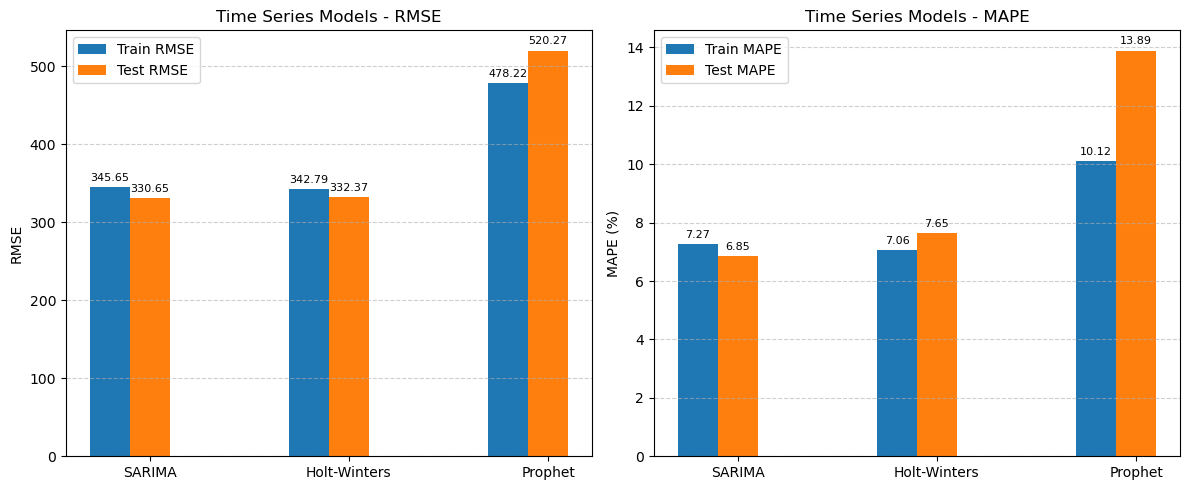

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ["SARIMA", "Holt-Winters", "Prophet"]
train_rmse = [345.65, 342.79, 478.22]
test_rmse = [330.65, 332.37, 520.27]
train_mape = [7.27, 7.06, 10.12]
test_mape = [6.85, 7.65, 13.89]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Function to add value labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax_id = bar.axes
        ax_id.annotate(f'{height:.2f}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # Offset
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=8, color='black')

# RMSE plot
bars1 = ax[0].bar(x - width, train_rmse, width, label='Train RMSE')
bars2 = ax[0].bar(x, test_rmse, width, label='Test RMSE')
ax[0].set_ylabel('RMSE')
ax[0].set_title('Time Series Models - RMSE')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].legend()
ax[0].grid(axis='y', linestyle='--', alpha=0.6)
add_labels(bars1)
add_labels(bars2)

# MAPE plot
bars3 = ax[1].bar(x - width, train_mape, width, label='Train MAPE')
bars4 = ax[1].bar(x, test_mape, width, label='Test MAPE')
ax[1].set_ylabel('MAPE (%)')
ax[1].set_title('Time Series Models - MAPE')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].legend()
ax[1].grid(axis='y', linestyle='--', alpha=0.6)
add_labels(bars3)
add_labels(bars4)

plt.tight_layout()
plt.show()

# Machine Learning Models Comparision plot

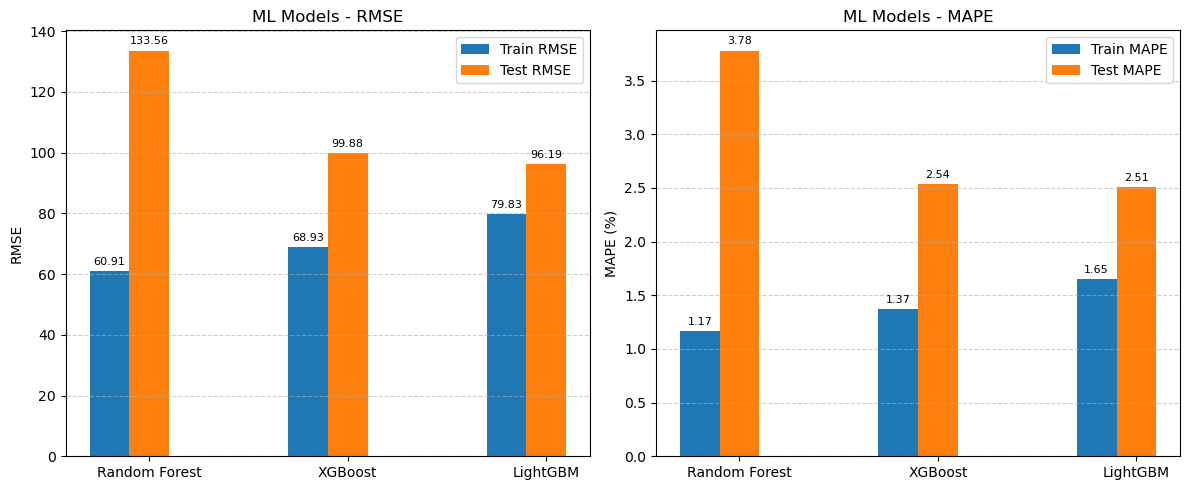

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ["Random Forest", "XGBoost", "LightGBM"]
train_rmse = [60.91, 68.93, 79.83]
test_rmse = [133.56, 99.88, 96.19]
train_mape = [1.17, 1.37, 1.65]
test_mape = [3.78, 2.54, 2.51]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Function to add value labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax_id = bar.axes
        ax_id.annotate(f'{height:.2f}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=8, color='black')

# RMSE plot
bars1 = ax[0].bar(x - width, train_rmse, width, label='Train RMSE')
bars2 = ax[0].bar(x, test_rmse, width, label='Test RMSE')
ax[0].set_ylabel('RMSE')
ax[0].set_title('ML Models - RMSE')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].legend()
ax[0].grid(axis='y', linestyle='--', alpha=0.6)
add_labels(bars1)
add_labels(bars2)

# MAPE plot
bars3 = ax[1].bar(x - width, train_mape, width, label='Train MAPE')
bars4 = ax[1].bar(x, test_mape, width, label='Test MAPE')
ax[1].set_ylabel('MAPE (%)')
ax[1].set_title('ML Models - MAPE')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].legend()
ax[1].grid(axis='y', linestyle='--', alpha=0.6)
add_labels(bars3)
add_labels(bars4)

plt.tight_layout()
plt.show()

# Hybrid Model Comparison Plots

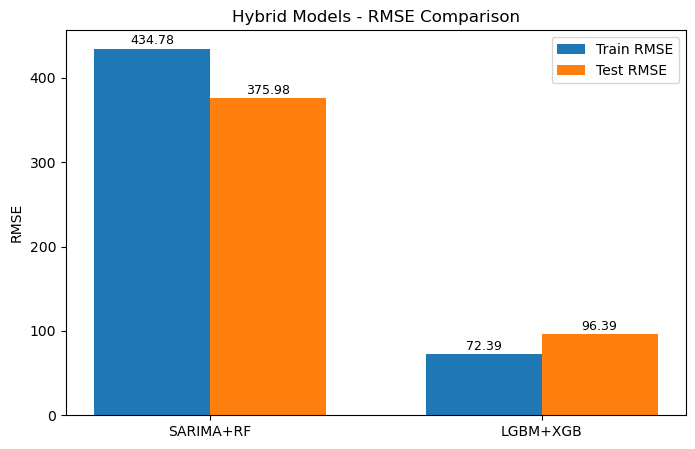

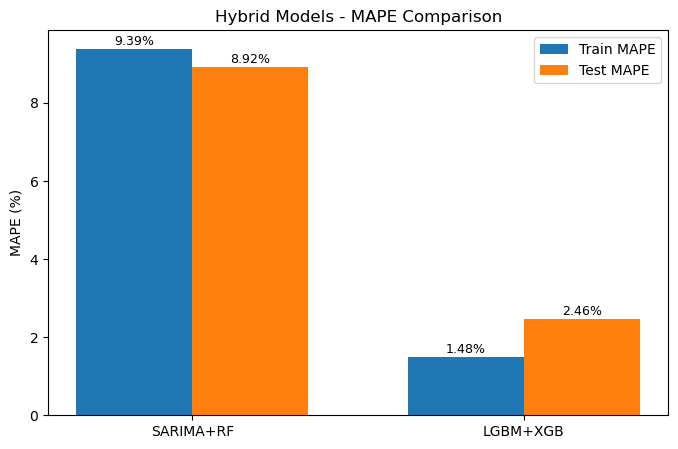

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Hybrid models data
models = ["SARIMA+RF", "LGBM+XGB"]

train_rmse = [434.78, 72.39]
test_rmse = [375.98, 96.39]

train_mape = [9.39, 1.48]
test_mape = [8.92, 2.46]

x = np.arange(len(models))
width = 0.35

# RMSE Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, train_rmse, width, label='Train RMSE')
bars2 = ax.bar(x + width/2, test_rmse, width, label='Test RMSE')

# Bar values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', fontsize=9)

ax.set_ylabel('RMSE')
ax.set_title('Hybrid Models - RMSE Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.show()

#  MAPE Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, train_mape, width, label='Train MAPE')
bars2 = ax.bar(x + width/2, test_mape, width, label='Test MAPE')

# Bar values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', fontsize=9)

ax.set_ylabel('MAPE (%)')
ax.set_title('Hybrid Models - MAPE Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.show()

# Model Comparison Plot

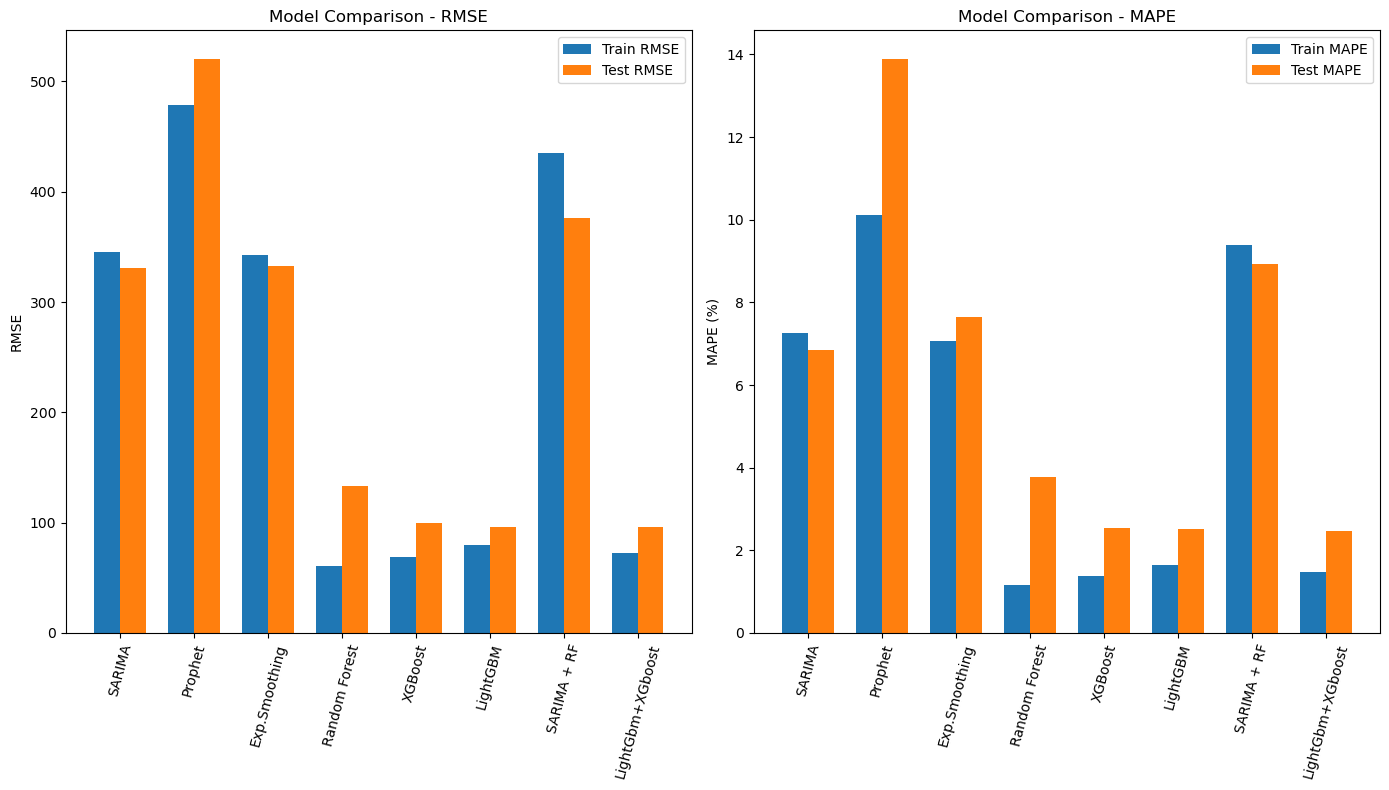

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Model': [
        'SARIMA', 'Prophet', 'Exp.Smoothing',
        'Random Forest', 'XGBoost', 'LightGBM',
         'SARIMA + RF', 'LightGbm+XGboost'
    ],
    'Train RMSE': [345.65, 478.22, 342.79, 60.91, 68.93, 79.83, 434.78, 72.39],
    'Test RMSE': [330.65, 520.27, 332.37, 133.56, 99.88, 96.16, 375.98, 96.39],
    'Train MAPE': [7.27, 10.12, 7.06, 1.17, 1.37, 1.65, 9.39, 1.48],
    'Test MAPE': [6.85, 13.89, 7.65, 3.78, 2.54, 2.51, 8.92, 2.46]
}

dff = pd.DataFrame(data)

# Plot settings
plt.figure(figsize=(14, 8))

# RMSE Bar Plot
plt.subplot(1, 2, 1)
x = range(len(dff))
width = 0.35
plt.bar([i - width/2 for i in x], dff['Train RMSE'], width=width, label='Train RMSE')
plt.bar([i + width/2 for i in x], dff['Test RMSE'], width=width, label='Test RMSE')
plt.xticks(x, dff['Model'], rotation=75)
plt.ylabel('RMSE')
plt.title('Model Comparison - RMSE')
plt.legend()

# MAPE Bar Plot
plt.subplot(1, 2, 2)
plt.bar([i - width/2 for i in x], dff['Train MAPE'], width=width, label='Train MAPE')
plt.bar([i + width/2 for i in x], dff['Test MAPE'], width=width, label='Test MAPE')
plt.xticks(x, dff['Model'], rotation=75)
plt.ylabel('MAPE (%)')
plt.title('Model Comparison - MAPE')
plt.legend()

plt.tight_layout()
plt.show()

In [79]:
dff.head(8)

,Model,Train RMSE,Test RMSE,Train MAPE,Test MAPE
0,SARIMA,345.65,330.65,7.27,6.85
1,Prophet,478.22,520.27,10.12,13.89
2,Exp.Smoothing,342.79,332.37,7.06,7.65
3,Random Forest,60.91,133.56,1.17,3.78
4,XGBoost,68.93,99.88,1.37,2.54
5,LightGBM,79.83,96.16,1.65,2.51
6,SARIMA + RF,434.78,375.98,9.39,8.92
7,LightGbm+XGboost,72.39,96.39,1.48,2.46
